# Learning Objectives

Towards the end of this lesson, you should be able to:
- save and load a predictive model
- constructing a stacking ensemble model
- comparing the performance of stacking
- experiment with GridSearchCV

# Load Libraries

In [1]:
import pandas as pd

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 500)

# Save and Load a Model

### Read Dataset

In [2]:
df = pd.read_csv("banking.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


### One-Hot Encoding

In [3]:
col_list = [col for col in df.columns.tolist() if
           df[col].dtype.name == "object"]

df_oh = df[col_list]
df = df.drop(col_list, 1)
df_oh = pd.get_dummies(df_oh)
df = pd.concat([df, df_oh], axis = 1)
df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


### Separate into X, y

In [4]:
y = df.y
X = df.drop("y", 1)
colnames = X.columns

# Train-Test-Split using 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Train, Save, and Load a Model

In [5]:
# train a Random Forest classifier
# max_depth=3, random_state=10

clf_rf = RandomForestClassifier(max_depth=3, random_state=10)
clf_rf.fit(X_train, y_train)

y_pred = clf_rf.predict(X_test)

# printing the accuracy, f1, precision, recall scores

print("Accuracy = {}".format(round((accuracy_score(y_test, y_pred)*100), 2)))
print("Recall = {}".format(round((recall_score(y_test, y_pred)*100), 2)))
print("Precision = {}".format(round((precision_score(y_test, y_pred)*100), 2)))
print("F1 = {}".format(round((f1_score(y_test, y_pred)*100), 2)))

Accuracy = 89.92
Recall = 16.67
Precision = 77.72
F1 = 27.45


In [7]:
# save the model - method 1 (using pickle)

import pickle

print('Model score before saving:', clf_rf.score(X_test, y_test))
pickle.dump(clf_rf, open('rf_model.sav','wb'))

loaded_model = pickle.load(open('rf_model.sav','rb'))
print('Model score from a loaded model:',
     loaded_model.score(X_test, y_test))

Model score before saving: 0.8992473901432386
Model score from a loaded model: 0.8992473901432386


In [8]:
# save the model - method 2 (using joblib)

import joblib

print('Model score:', clf_rf.score(X_test, y_test))
joblib.dump(clf_rf, 'rf_model.sav')

loaded_model = joblib.load('rf_model.sav')
print('Loaded model score:', loaded_model.score(X_test, y_test))

Model score: 0.8992473901432386
Loaded model score: 0.8992473901432386


# Stacked Ensemble Modeling

In [9]:
# get a stacking ensemble of models

def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('rf', RandomForestClassifier()))    
    level0.append(('bayes', GaussianNB()))
    
    # define the stacking ensemble
       
    level1 = GaussianNB()     
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
        
    
    return model

### Preparing the list of models

In [10]:
# construct a list of models in a dictionary

models = dict()

models['knn'] = KNeighborsClassifier()
models['cart'] = DecisionTreeClassifier()
models['bayes'] = GaussianNB()
models['rf'] = RandomForestClassifier()

models['stacking'] = get_stacking()

### Evaluating the Models

In [11]:
# evaluate a given model using cross-validation

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y,
                             scoring='f1',
                             cv=cv,
                             n_jobs=-1,
                             error_score='raise')
    return scores


>knn 0.535 (0.015)
>cart 0.512 (0.020)
>bayes 0.461 (0.015)
>rf 0.542 (0.019)
>stacking 0.615 (0.015)


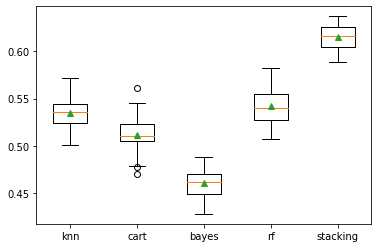

In [12]:
# evaluate the models and store results

results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
# plot model performance for comparison - based on f1-score

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Model Hyperparameter Tuning

In [13]:
# Instantiate a DecisionTreeClassifier 'dt'

dt = DecisionTreeClassifier(random_state=10)

In [14]:
# Print out 'dt's hyperparameters

print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 10, 'splitter': 'best'}


In [15]:
# Define the grid of hyperparameters 'params_dt'

params_dt = {'max_depth': [2, 3, 4], 
             'min_samples_leaf': [0.04, 0.06], 
             'max_features': [0.2, 0.4, 0.6, 0.8]}

# Instantiate a 10-fold CV grid search object 'grid_dt', scoring is based on "accuracy"

grid_dt = GridSearchCV(estimator=dt,
                      param_grid=params_dt,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=-1)

# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06]},
             scoring='accuracy')

In [16]:
# Extract best hyperparameters from 'grid_dt'

best_hyperparams = grid_dt.best_params_

print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 3, 'max_features': 0.6, 'min_samples_leaf': 0.04}


In [17]:
# Extract best CV score from 'grid_dt'

best_CV_score = grid_dt.best_score_

print('Best CV accuracy = {}'.format(best_CV_score))

Best CV accuracy = 0.9064339908952957


# Exercise on GridSearchCV: 
### Predict Diamond Price using RandomForestRegressor

### Read Dataset

In [18]:
df = pd.read_csv("diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


### One-Hot Encoding

In [19]:
col_list = [col for col in df.columns.tolist() if df[col].dtype.name == "object"]
df_oh = df[col_list]
df = df.drop(col_list, 1)
df_oh = pd.get_dummies(df_oh)
df = pd.concat([df, df_oh], axis=1)

df.head()

,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


### Separate into X, y

In [20]:
y = df.price
X = df.drop("price", 1)
colnames = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        

### Train a Random Forest Regressor

In [21]:
# Instantiate a random forests regressor 'rf'

rf = RandomForestRegressor(random_state=10)

# Inspect rf' s hyperparameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

### Define the hyper-parameters

In [22]:
# Define a grid of hyperparameter 'params_rf'

params_rf = {'n_estimators':[300, 400, 500],
            'max_depth':[4, 6, 8],
            'min_samples_leaf':[0.1,0.2],
            'max_features':['log2','sqrt']
}

# Instantiate 'grid_rf'
grid_rf = GridSearchCV(estimator = rf, param_grid=params_rf,
                      cv=3, scoring='neg_mean_squared_error',
                      verbose=1, n_jobs=-1)


### Train the model

In [23]:
# Fit 'grid_rf' to the training set

grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

### Print out the best hyperparameters


In [24]:
# Extract best hyperparameters from 'grid_rf'

best_hyperparams = grid_rf.best_params_ 
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 300}


### Perform Prediction using the Best Model

In [25]:
# Extract best model from 'grid_rf'

best_model = grid_rf.best_estimator_

# Predict the test set labels
y_pred = best_model.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE

print('Test set RMSE of rfr: {:.2f}'.format(rmse_test))

Test set RMSE of rfr: 3038.36
